# Module 3: Training and Prediction

## Objectives
1. 
2. **Simple Model Training**:
   - Construct a basic predictive model using logistic regression to determine how well the 'survived' outcome can be predicted from other features.
   - Evaluate the performance of the model to understand the predictability of survival based on the dataset.
3. **First Submission**:
   - Use the trained model to make predictions on new, unseen test data.
   - Prepare and submit the prediction results, ensuring proper formatting and adherence to the submission guidelines.

## Dataset Description
The Titanic dataset contains data for a number of passengers aboard the famous ship, Titanic. It provides detailed demographic information, ticket details, and survival outcomes which make it an excellent resource for binary classification tasks, such as predicting survival. Here is a breakdown of the features included in the dataset:

- **survival**: Survival status (0 = No, 1 = Yes)
- **class**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- **sex**: Sex of the passenger (0 = female, 1 = male)
- **age**: Age of the passenger
- **sibsp**: Number of Siblings/Spouses Aboard
- **parch**: Number of Parents/Children Aboard
- **fare**: Passenger Fare
- **cabin**: Have Cabin (0 = No, 1 = Yes)
- **embarked**: Port of Embarkation (encoded as integers)

## Expected Outcomes
By the end of this module, we expect to:
- Develop a preliminary predictive model to estimate survival chances.
- Successfully generate and submit a set of predictions, thereby applying the insights and model to practical outcomes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Data Collection

In [2]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/course/module3_course_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/course/module3_course_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_course_train.csv')
download_file(test_data_url, 'module3_course_test.csv')

Downloaded module3_course_train.csv from https://www.raphaelcousin.com/modules/module3/course/module3_course_train.csv
Downloaded module3_course_test.csv from https://www.raphaelcousin.com/modules/module3/course/module3_course_test.csv


In [3]:
df =  pd.read_csv("module3_course_train.csv", sep=",", index_col='id')

### Data Preprocessing

In [4]:
def minimal_data_prep(data_df):
    data_df.drop('embarked', axis=1, inplace=True)
    data_df.fillna(-1, inplace=True)
    return data_df

In [5]:
df =  minimal_data_prep(df)

## Model Building

In [6]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [7]:
# Preparing the data
y = df['survived']
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin']]


In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

/home/raphael/.cache/pypoetry/virtualenvs/data-science-practice-izly4xBC-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
# Evaluate the model

def pred_eval(model, X_data, y_target):
    y_pred = model.predict(X_data)
    accuracy = accuracy_score(y_target, y_pred)
    conf_matrix = confusion_matrix(y_target, y_pred)
    class_report = classification_report(y_target, y_pred)
    print("Accuracy of the model:", accuracy)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)
    return y_pred

In [11]:
# Predict and eval on the train data
y_pred = pred_eval(model, X_train, y_train)

Accuracy of the model: 0.7980884109916367
Confusion Matrix:
 [[452  72]
 [ 97 216]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       524
           1       0.75      0.69      0.72       313

    accuracy                           0.80       837
   macro avg       0.79      0.78      0.78       837
weighted avg       0.80      0.80      0.80       837



In [12]:
# Predict and eval on the test data
y_pred = pred_eval(model, X_test, y_test)


Accuracy of the model: 0.8142857142857143
Confusion Matrix:
 [[115  10]
 [ 29  56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.86       125
           1       0.85      0.66      0.74        85

    accuracy                           0.81       210
   macro avg       0.82      0.79      0.80       210
weighted avg       0.82      0.81      0.81       210



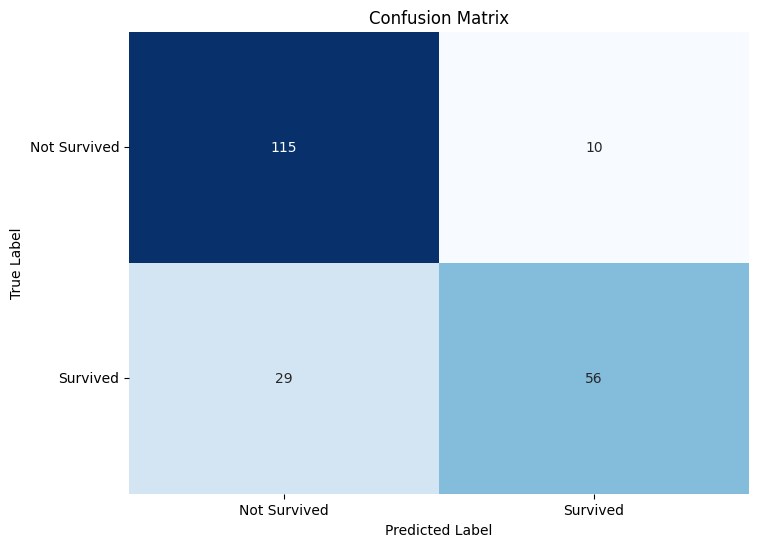

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(np.unique(y_test))) + 0.5, ['Not Survived', 'Survived'])
plt.yticks(np.arange(len(np.unique(y_test))) + 0.5, ['Not Survived', 'Survived'], rotation=0)
plt.show()

## Predict test.csv

### Data Collection

In [14]:
df_train =  pd.read_csv("module3_course_train.csv", sep=",", index_col='id')
X_test =  pd.read_csv("module3_course_test.csv", sep=",", index_col='id')

### Data Preprocessing

In [15]:
df_train =  minimal_data_prep(df_train)
X_test = minimal_data_prep(X_test)

### Model Training and Prediction

In [16]:
# Preparing the data
X_train = df_train[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'cabin']]
y_train = df['survived']

# Train on all information you have
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



/home/raphael/.cache/pypoetry/virtualenvs/data-science-practice-izly4xBC-py3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Generating Submission File

In [17]:
submission = pd.DataFrame({
    'id': X_test.index,
    'Survived': y_pred 
})

submission.to_csv('submission.csv', index=False, sep=',')
submission.sample(10)

,id,Survived
150,785,1
106,710,0
127,626,0
175,303,1
21,51,1
180,589,1
128,282,1
153,857,1
233,730,0
59,845,1
